In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt 

from src.utils import time_shape_embedding
from src.static.kernel import TSGaussGaussKernel,VFTSGaussKernel, GaussKernel
from src.static.plotting import plot2Dfigure, time_shape_plot2Dfigure

## General

In [2]:
from src.static.lddmm import varifold_registration, DeformationGradient

iteration:  1 / 100  -- loss:  785.09
iteration:  10 / 100  -- loss:  206.26
iteration:  20 / 100  -- loss:  89.08
iteration:  30 / 100  -- loss:  24.90
iteration:  40 / 100  -- loss:  8.49
iteration:  50 / 100  -- loss:  3.57
iteration:  60 / 100  -- loss:  2.07
iteration:  70 / 100  -- loss:  1.46
iteration:  80 / 100  -- loss:  1.12
iteration:  90 / 100  -- loss:  0.99
iteration:  100 / 100  -- loss:  0.95


(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

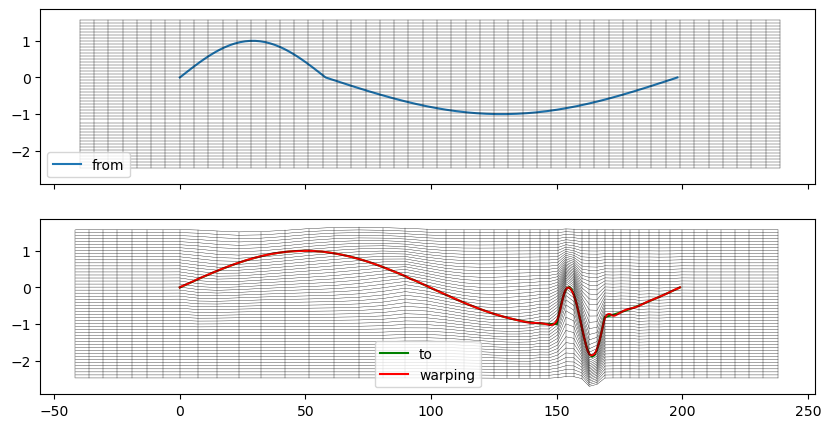

In [10]:
t_sig = np.sin(np.linspace(0,1,200)*2*np.pi)
t_sig[150:170] += 1*np.sin(np.linspace(0,1,20)*2*np.pi)
t_sig = t_sig.reshape(-1,1)
t_sig = time_shape_embedding(t_sig)
s_sig = np.vstack((np.sin(np.linspace(0,0.5,59)*2*np.pi).reshape(-1,1)[:-1],np.sin(np.linspace(0.5,1,141)*2*np.pi).reshape(-1,1)))
s_sig = time_shape_embedding(s_sig)

Kv = VFTSGaussKernel(1,0.1,50,1,1)
Kl = TSGaussGaussKernel(5,1,1,1)

p,q = varifold_registration(s_sig,t_sig,Kv,Kl)
plot2Dfigure(s_sig,t_sig,p,Kv)

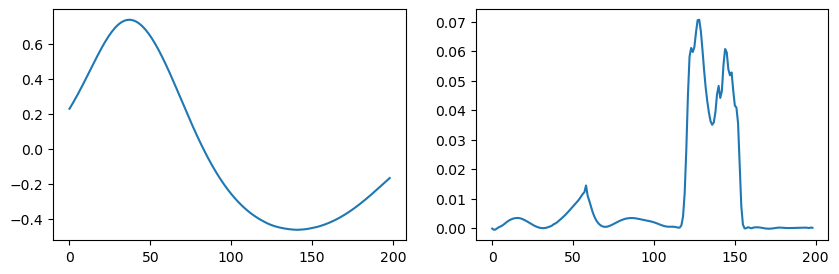

In [4]:
dg = DeformationGradient(Kv)
gr = dg(p,s_sig)

fig,axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(gr[:,0,0])
axs[1].plot(gr[:,1,1])

## Time

In [7]:
from src.static.lddmm import time_varifold_registration, TimeDeformationGradient

iteration:  1 / 100  -- loss:  170.89
iteration:  10 / 100  -- loss:  56.43
iteration:  20 / 100  -- loss:  40.53
iteration:  30 / 100  -- loss:  41.72
iteration:  40 / 100  -- loss:  38.84
iteration:  50 / 100  -- loss:  38.13
iteration:  60 / 100  -- loss:  37.61
iteration:  70 / 100  -- loss:  37.37
iteration:  80 / 100  -- loss:  37.16
iteration:  90 / 100  -- loss:  36.98
iteration:  100 / 100  -- loss:  36.84


(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

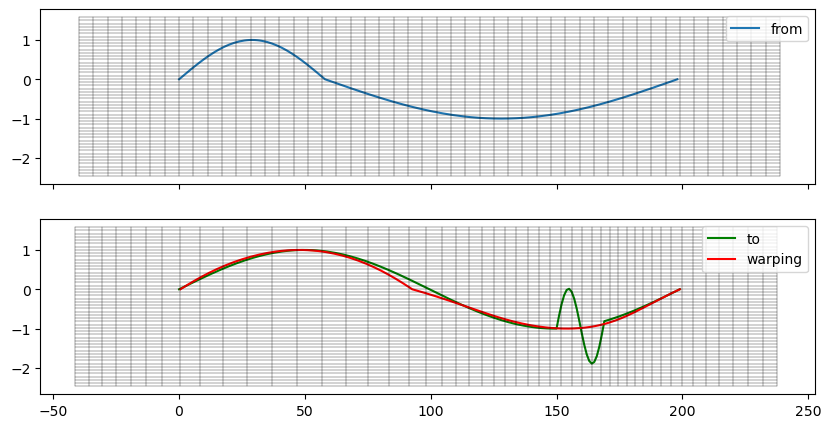

In [11]:
t_sig = np.sin(np.linspace(0,1,200)*2*np.pi)
t_sig[150:170] += 1*np.sin(np.linspace(0,1,20)*2*np.pi)
t_sig = t_sig.reshape(-1,1)
t_sig = time_shape_embedding(t_sig)
s_sig = np.vstack((np.sin(np.linspace(0,0.5,59)*2*np.pi).reshape(-1,1)[:-1],np.sin(np.linspace(0.5,1,141)*2*np.pi).reshape(-1,1)))
s_sig = time_shape_embedding(s_sig)

Kv = GaussKernel(40)
Kl = TSGaussGaussKernel(1,1,1,1)

p,q =time_varifold_registration(s_sig,t_sig,Kv,Kl)
plot2Dfigure(s_sig,t_sig,p,Kv,"time")


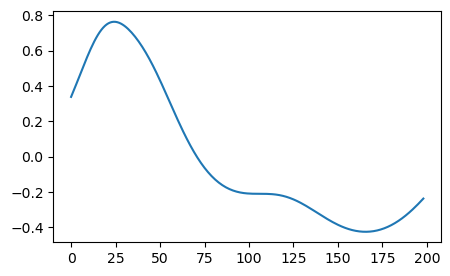

In [12]:
dg = TimeDeformationGradient(Kv)
gr = dg(p,s_sig)

fig,axs = plt.subplots(1,1,figsize=(5,3))
axs.plot(gr[:,0])

## Shape

In [14]:
from src.static.kernel import VFSGaussKernel
from src.static.lddmm import shape_varifold_registration, ShapeDeformationGradient

iteration:  1 / 100  -- loss:  170.89
iteration:  10 / 100  -- loss:  28.30
iteration:  20 / 100  -- loss:  6.65
iteration:  30 / 100  -- loss:  2.38
iteration:  40 / 100  -- loss:  1.51
iteration:  50 / 100  -- loss:  1.21
iteration:  60 / 100  -- loss:  1.10
iteration:  70 / 100  -- loss:  1.06
iteration:  80 / 100  -- loss:  1.04
iteration:  90 / 100  -- loss:  1.03
iteration:  100 / 100  -- loss:  1.02


(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

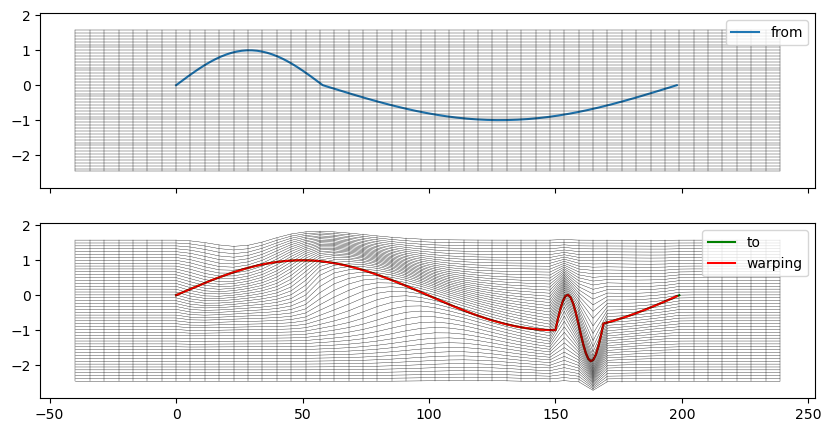

In [16]:
t_sig = np.sin(np.linspace(0,1,200)*2*np.pi)
t_sig[150:170] += 1*np.sin(np.linspace(0,1,20)*2*np.pi)
t_sig = t_sig.reshape(-1,1)
t_sig = time_shape_embedding(t_sig)
s_sig = np.vstack((np.sin(np.linspace(0,0.5,59)*2*np.pi).reshape(-1,1)[:-1],np.sin(np.linspace(0.5,1,141)*2*np.pi).reshape(-1,1)))
s_sig = time_shape_embedding(s_sig)


Kv = VFSGaussKernel(1.,1.)
Kl = TSGaussGaussKernel(1,1,1,1)

p,q = shape_varifold_registration(s_sig,t_sig,Kv,Kl)
plot2Dfigure(s_sig,t_sig,p,Kv,"shape")


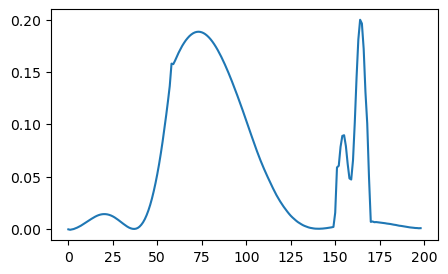

In [17]:
dg = ShapeDeformationGradient(Kv)
gr = dg(p,s_sig)

fig,axs = plt.subplots(1,1,figsize=(5,3))
axs.plot(gr[:,0])

## Time Shape

In [18]:
from src.static.lddmm import time_shape_varifold_registration, TimeShapeDeformationGradient

iteration:  1 / 100  -- loss:  170.89
iteration:  10 / 100  -- loss:  87.18
iteration:  20 / 100  -- loss:  42.70
iteration:  30 / 100  -- loss:  41.19
iteration:  40 / 100  -- loss:  40.08
iteration:  50 / 100  -- loss:  38.72
iteration:  60 / 100  -- loss:  38.04
iteration:  70 / 100  -- loss:  37.64
iteration:  80 / 100  -- loss:  37.38
iteration:  90 / 100  -- loss:  37.23
iteration:  100 / 100  -- loss:  37.15
iteration:  1 / 100  -- loss:  33.84
iteration:  10 / 100  -- loss:  14.87
iteration:  20 / 100  -- loss:  9.82
iteration:  30 / 100  -- loss:  8.67
iteration:  40 / 100  -- loss:  8.31
iteration:  50 / 100  -- loss:  8.13
iteration:  60 / 100  -- loss:  8.07
iteration:  70 / 100  -- loss:  8.05
iteration:  80 / 100  -- loss:  8.04
iteration:  90 / 100  -- loss:  8.04
iteration:  100 / 100  -- loss:  8.04


(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

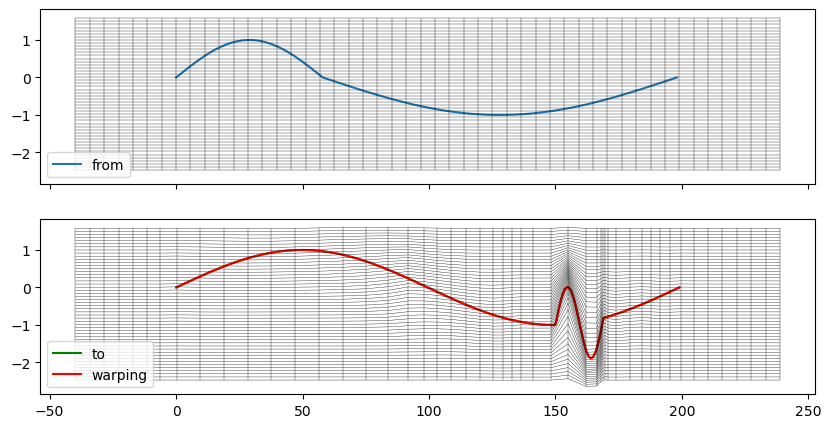

In [19]:
t_sig = np.sin(np.linspace(0,1,200)*2*np.pi)
t_sig[150:170] += 1*np.sin(np.linspace(0,1,20)*2*np.pi)
t_sig = t_sig.reshape(-1,1)
t_sig = time_shape_embedding(t_sig)
s_sig = np.vstack((np.sin(np.linspace(0,0.5,59)*2*np.pi).reshape(-1,1)[:-1],np.sin(np.linspace(0.5,1,141)*2*np.pi).reshape(-1,1)))
s_sig = time_shape_embedding(s_sig)

#s_sig,t_sig = t_sig,s_sig


#time
t_Kv = GaussKernel(10)
t_Kl = TSGaussGaussKernel(1,1,1,1)

# shape
s_Kv = VFSGaussKernel(1,1)
s_Kl = TSGaussGaussKernel(1,1,1,1)

t_p0,t_q0,s_p0,s_q0 = time_shape_varifold_registration(s_sig,t_sig,t_Kv,t_Kl,s_Kv,s_Kl)

time_shape_plot2Dfigure(s_sig,t_sig,t_p0,s_p0,t_Kv,s_Kv)


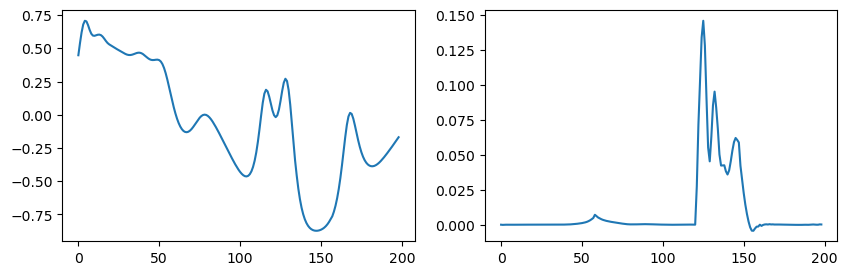

In [20]:
dg = TimeShapeDeformationGradient(t_Kv,s_Kv)
tgr,sgr = dg(t_p0,s_p0,s_sig)

fig,axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(tgr[:,0])
axs[1].plot(sgr[:,0])